# Statistics Basic To Advance

CALCULATING MEAN MEDIAN AND MODE

In [20]:
import pandas as pd
import numpy as np

df=pd.read_csv('income.csv')
new_column_name={'Monthly Income ($)':'Income'}
df.rename(columns=new_column_name,inplace=True)
df.head()

,Name,Income
0,Rob,5000
1,Rafiq,6000
2,Nina,4000
3,Sofia,7500
4,Mohan,8000


In [21]:
df.Income.describe()

count    7.000000e+00
mean     1.433929e+06
std      3.777283e+06
min      4.000000e+03
25%      5.500000e+03
50%      7.000000e+03
75%      7.750000e+03
max      1.000000e+07
Name: Income, dtype: float64

Calculating Quantile


In [22]:
df.Income.quantile(.45,interpolation='lower')

6000

In [23]:
percentile_99=df.Income.quantile(.99)
percentile_99

9400479.999999994

DETECTING AND REMOVING AN OUTLIER

In [28]:
df_no_Outlier= df[df.Income>percentile_99]
df_no_Outlier

,Name,Income
6,Elon Musk,10000000


In [30]:
#Removing the outlier 
df_remove_Outlier= df[df.Income<=percentile_99]
df_remove_Outlier


,Name,Income
0,Rob,5000
1,Rafiq,6000
2,Nina,4000
3,Sofia,7500
4,Mohan,8000
5,Tao,7000


In [38]:
mean=df_remove_Outlier.Income.mean()
mean

6250.0

In [42]:
median=df_remove_Outlier.Income.median()
median

6500.0

# CHI-SQUARE TEST

In [44]:
import scipy.stats as stats

import pandas as pd
import seaborn as sns 
import numpy as np

dataset=pd.read_csv('tips.csv')
dataset

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
#Finding any association between sex and smoker

dataset_table=pd.crosstab(dataset['smoker'],dataset['sex'])
dataset_table

Observed Values

In [47]:
Observed_Values = dataset_table.values 
print("Observed Values :-\n",Observed_Values)


Observed Values :-
 [[54 97]
 [33 60]]


CHI SQUARE CONTIGENCY FUNCTION

In [49]:
val=stats.chi2_contingency(dataset_table)
val

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[53.84016393, 97.15983607],
       [33.15983607, 59.84016393]]))

In [53]:
#From the previous code the observed value was the output of the 'observed_values' but the expected result is 'expected_freq'


In [54]:
Expected_Values=val[3]


CALCULATING DEGREE OF FREEDOM

In [55]:
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1) #MAIN FORUMLA 
print("Degree of Freedom:-",ddof)
alpha = 0.05


Degree of Freedom:- 1


In [56]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
     

In [57]:
print("chi-square statistic:-",chi_square_statistic)


chi-square statistic:- 0.001934818536627623


In [58]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


P VALUE

In [59]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)
     


p-value: 0.964915107315732
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.964915107315732


DEFINING THE DECISION RULE 

In [60]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")


Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


# T TEST


A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features

T-test has 2 types : 1. one sampled t-test 2. two-sampled t-test.

In [62]:
ages=[10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70]
len(ages)


32

In [63]:
import numpy as np
ages_mean=np.mean(ages)
print(ages_mean)

30.34375


In [64]:
## Lets take sample

sample_size=10
age_sample=np.random.choice(ages,sample_size)

In [65]:
age_sample


array([26, 55, 10, 25, 35, 18, 26, 23, 18, 35])

In [67]:
from scipy.stats import ttest_1samp
ttest,p_value=ttest_1samp(age_sample,30)
print(p_value)


0.47857315977378545


In [68]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


# Two-sample T-test With Python


The Independent Samples t Test or 2-sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a parametric test. This test is also known as: Independent t Test



In [71]:
np.random.seed(6)
school_ages=stats.poisson.rvs(loc=18,mu=35,size=1500)
classA_ages=stats.poisson.rvs(loc=18,mu=30,size=60)



In [72]:
classA_ages.mean()


46.9

In [74]:
_,p_value=stats.ttest_1samp(a=classA_ages,popmean=school_ages.mean())
p_value


1.139027071016194e-13

In [75]:
school_ages.mean()


53.303333333333335

In [76]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")
     


 we are rejecting null hypothesis


In [78]:
np.random.seed(12)
ClassB_ages=stats.poisson.rvs(loc=18,mu=33,size=60)
ClassB_ages.mean()


50.63333333333333

In [79]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")


 we are rejecting null hypothesis


# CORRELATION

In [80]:
df=pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [83]:
import seaborn as sns
df.corr()


C:\Users\User\AppData\Local\Temp\ipykernel_12732\1798287071.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


pairplot() is used to A pair plot is a grid of scatterplots where each variable in the DataFrame is plotted against every other variable.

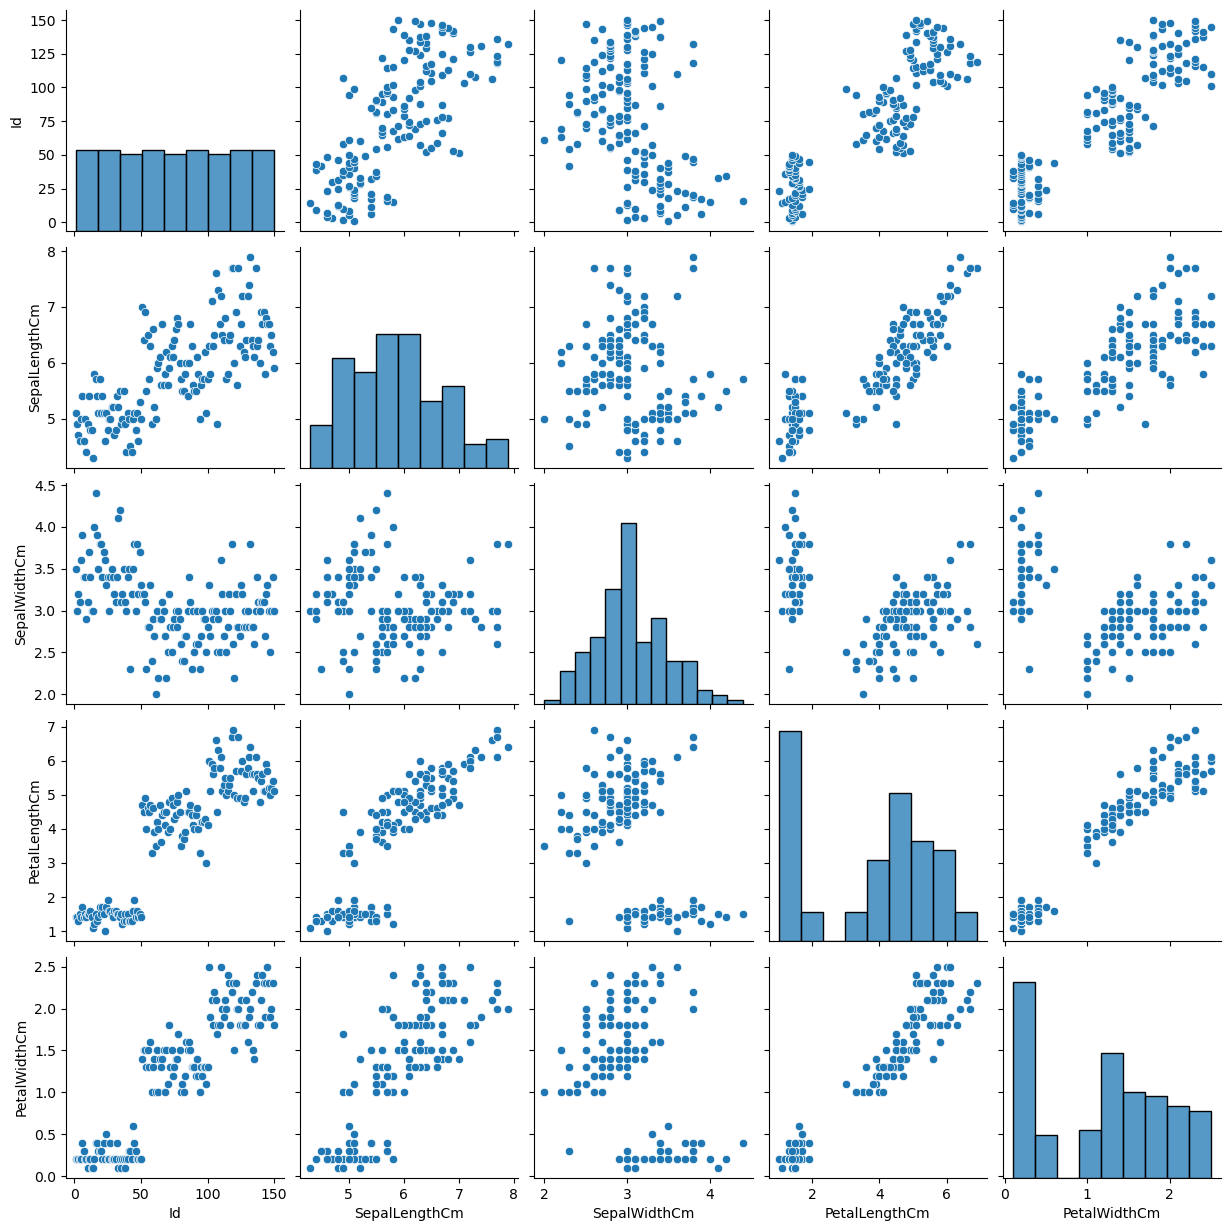

In [82]:
sns.pairplot(df)


BOX PLOT

<Axes: >

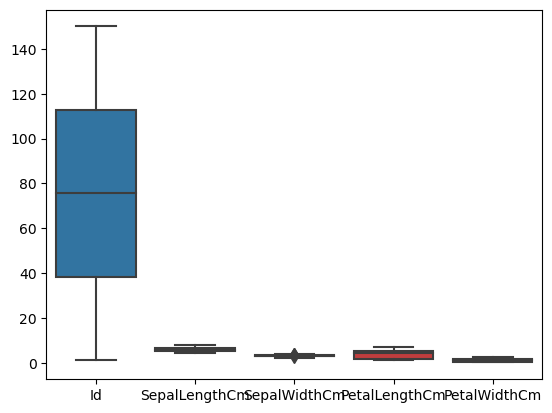

In [85]:
sns.boxplot(df)

# FIVE NUMBER SUMMAARY

In [94]:
example=[6, 47, 49, 15, 43, 41, 7, 39, 43, 41, 36.]
ds=pd.Series(example)
ds.describe()


count    11.000000
mean     33.363636
std      15.976688
min       6.000000
25%      25.500000
50%      41.000000
75%      43.000000
max      49.000000
dtype: float64

From the above describe function:
1)Minimum = 6.0
2)Quantile 1 =25.50
3)Median = 33.36
4)Quantile 3 = 43.00
5)Maximum = 49.00

<Axes: >

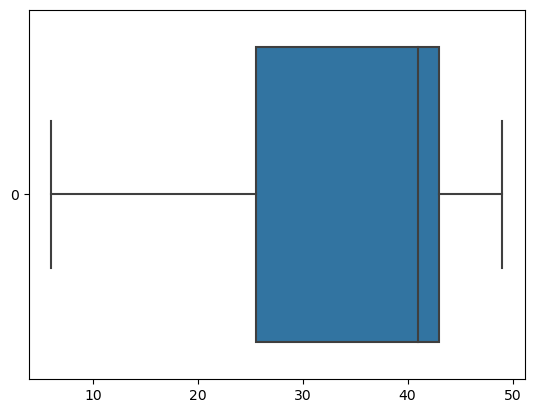

In [100]:
sns.boxplot(ds,orient="horizontal",fliersize=5)

# BINOMIAL DISTRIBUTION

In [101]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [105]:
n=7
p=0.6
k=np.arange(0,8)
k


array([0, 1, 2, 3, 4, 5, 6, 7])

In [107]:
binomial = stats.binom.pmf(k,n,p)
binomial


array([0.0016384, 0.0172032, 0.0774144, 0.193536 , 0.290304 , 0.2612736,
       0.1306368, 0.0279936])

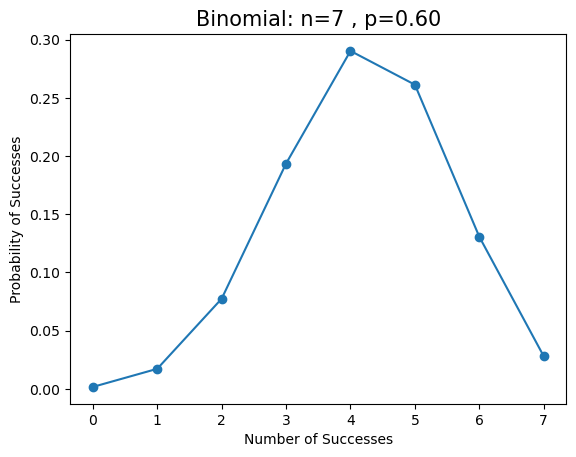

In [109]:
plt.plot(k,binomial,'o-')
plt.title('Binomial: n=%i , p=%.2f' % (n,p), fontsize=15)
plt.xlabel('Number of Successes')
plt.ylabel('Probability of Successes')
plt.show()

In [111]:
n=len(binomial)
n

8

In [112]:
sum(binomial)


0.9999999999999999

# DESCRIPTIVE STATISTICS

Cardio Good Fitness Case Study - Descriptive Statistics
The market research team at AdRight is assigned the task to identify the profile of the typical customer for each treadmill product offered by CardioGood Fitness. The market research team decides to investigate whether there are differences across the product lines with respect to customer characteristics. The team decides to collect data on individuals who purchased a treadmill at a CardioGoodFitness retail store during the prior three months. The data are stored in the CardioGoodFitness.csv file.

The team identifies the following customer variables to study:
product purchased, TM195, TM498, or TM798;
gender;
age, in years;
education, in years;
relationship status, single or partnered;
annual household income ;
annual household income ;
average number of times the customer plans to use the treadmill each week;
average number of miles the customer expects to walk/run each week;
and self-rated fitness on an 1-to-5 scale, where 1 is poor shape and 5 is excellent shape

In [113]:
# Load the necessary packages

import numpy as np
import pandas as pd

In [114]:
# Load the Cardio Dataset

mydata = pd.read_csv('CardioGoodFitness.csv')

In [115]:
mydata.head()


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [116]:
mydata.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [117]:
mydata.describe(include="all")


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'Usage'}>,
        <Axes: title={'center': 'Fitness'}>],
       [<Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Miles'}>]], dtype=object)

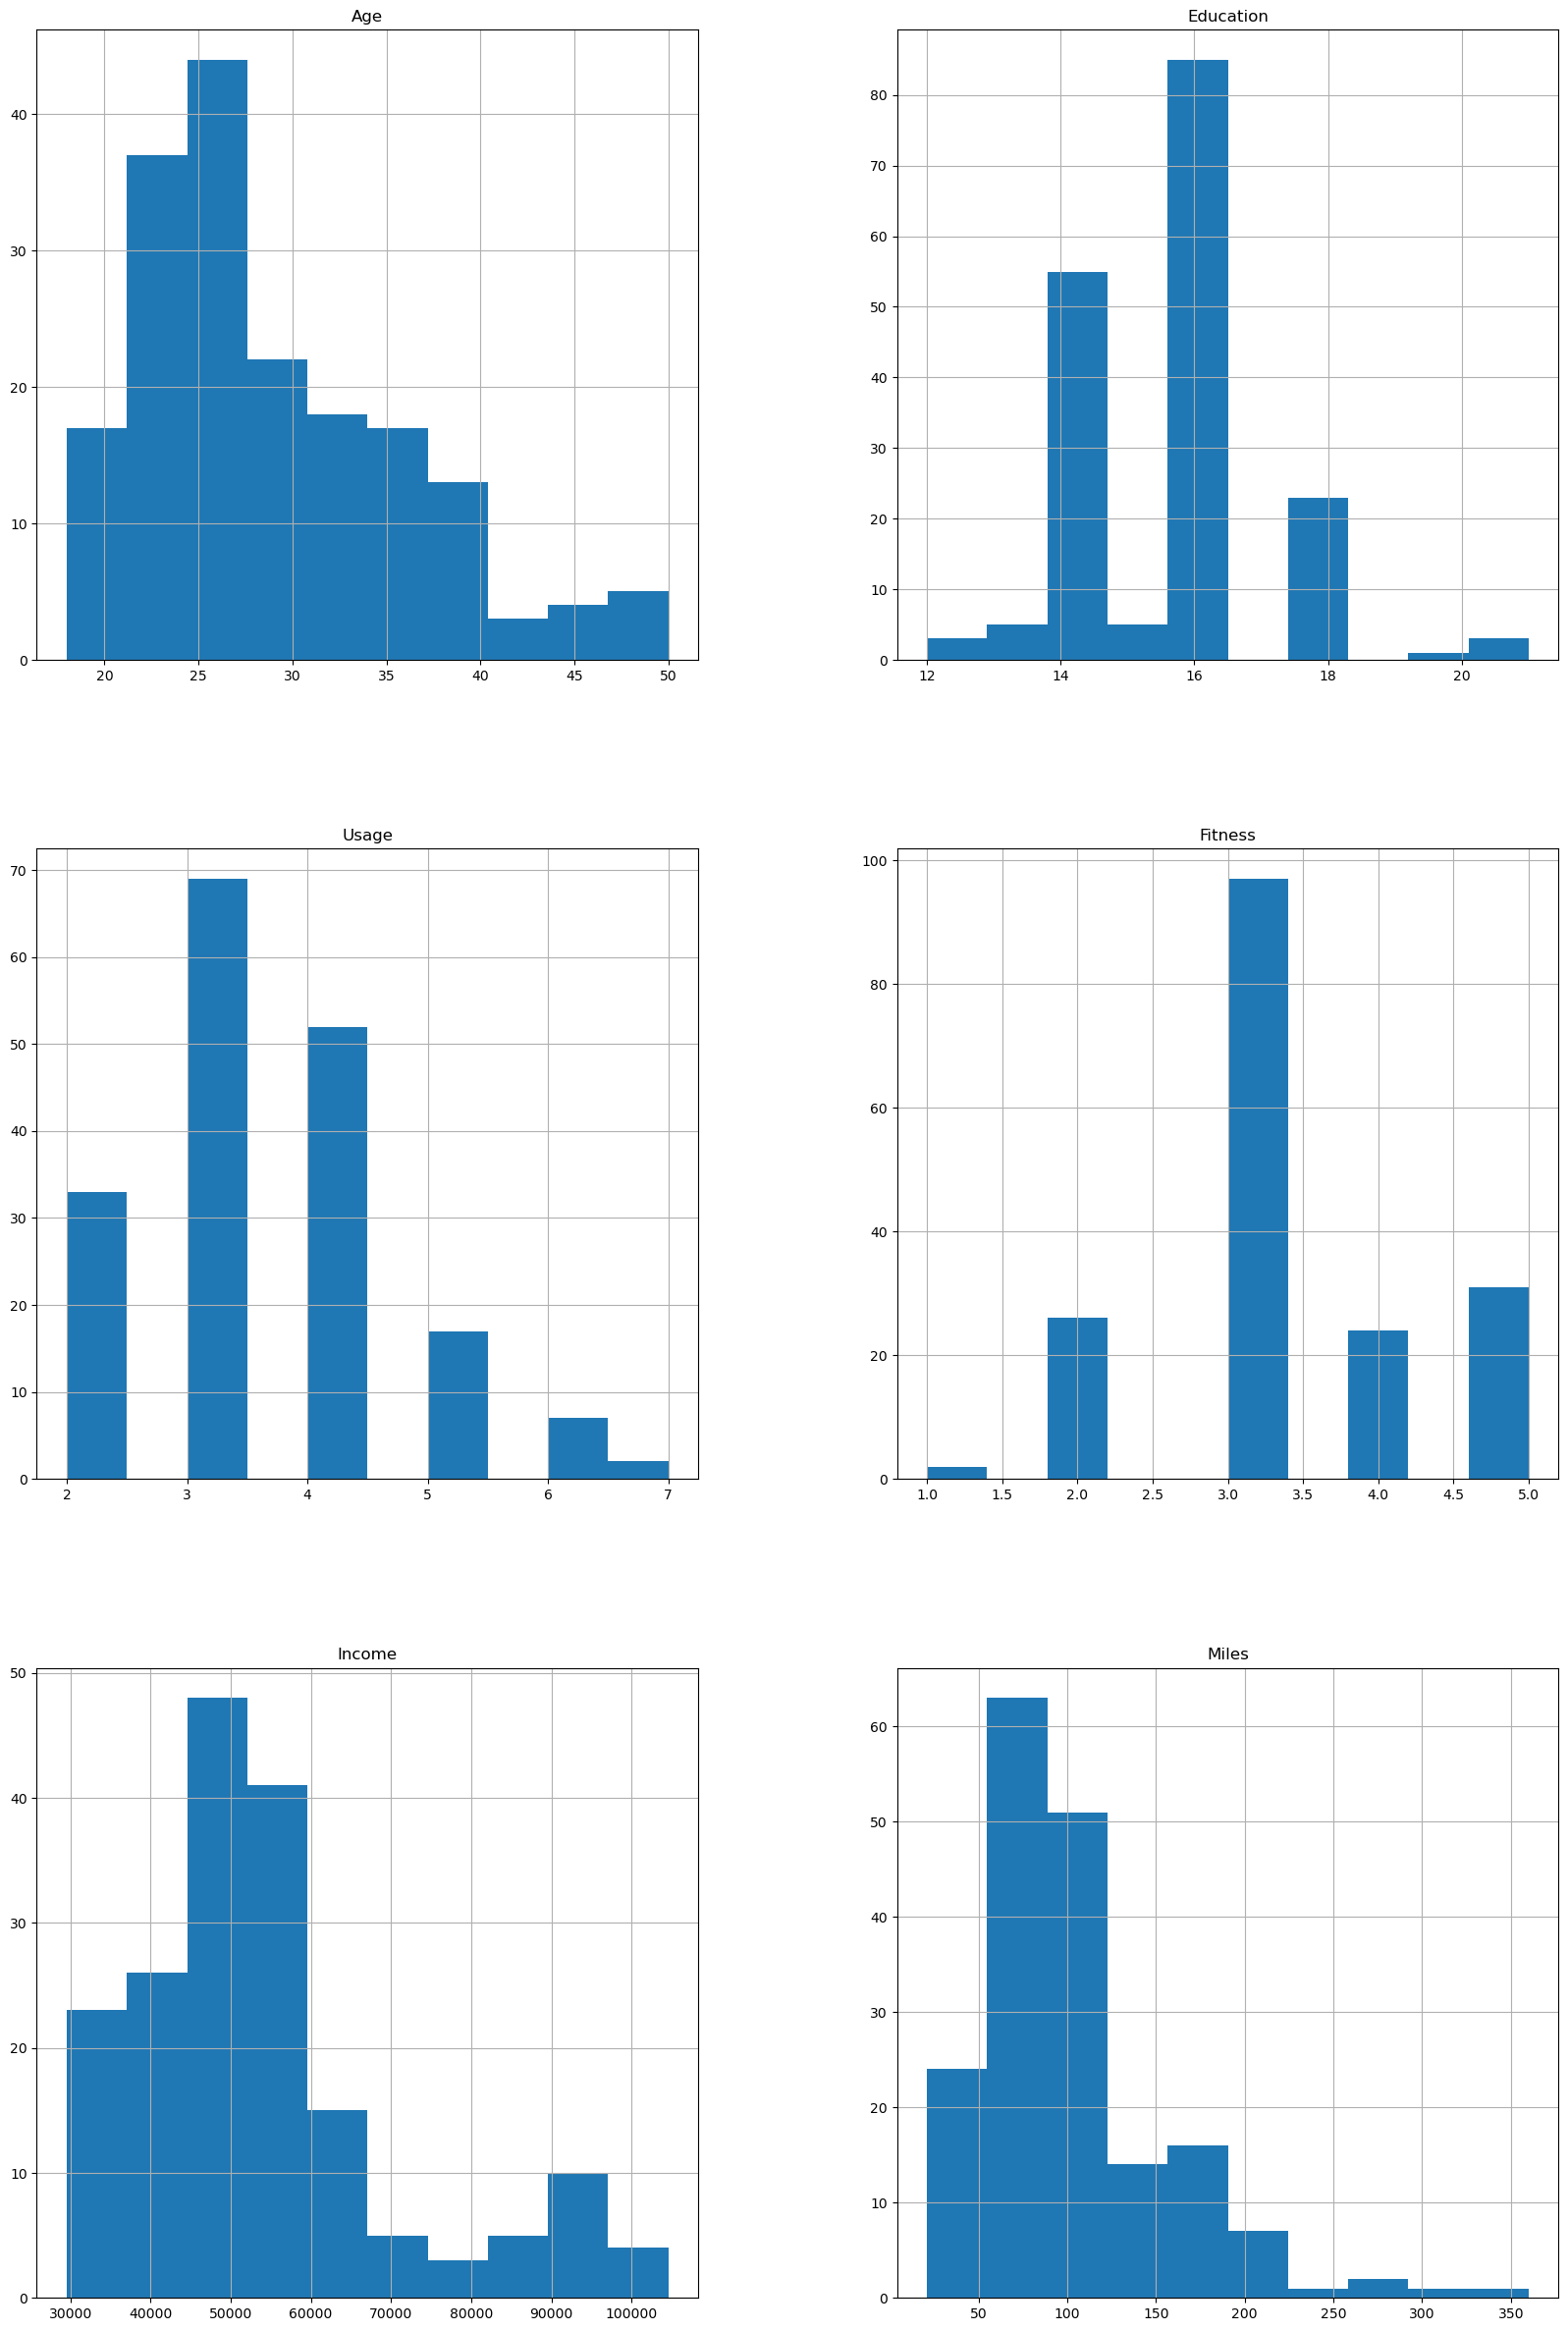

In [118]:
import matplotlib.pyplot as plt
%matplotlib inline

mydata.hist(figsize=(20,30))


<Axes: xlabel='Gender', ylabel='Age'>

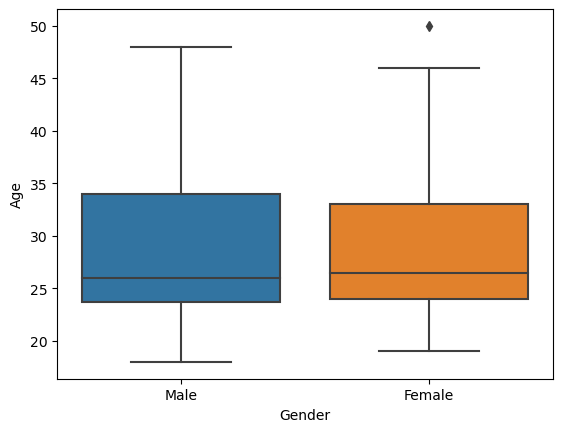

In [119]:
import seaborn as sns

sns.boxplot(x="Gender", y="Age", data=mydata)


In [120]:
pd.crosstab(mydata['Product'],mydata['Gender'] )


Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


In [121]:
pd.crosstab(mydata['Product'],mydata['MaritalStatus'] )


MaritalStatus,Partnered,Single
Product,,
TM195,48,32
TM498,36,24
TM798,23,17


<Axes: xlabel='Product', ylabel='count'>

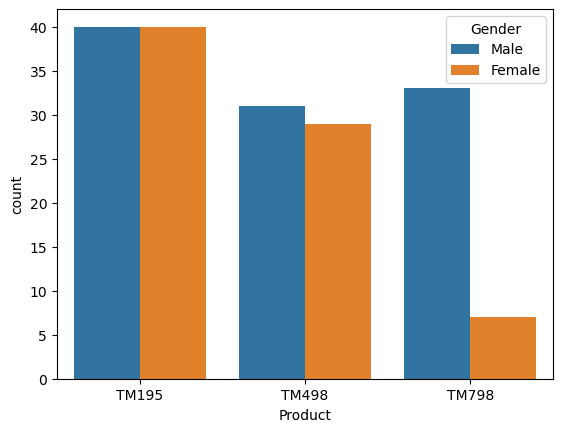

In [122]:
sns.countplot(x="Product", hue="Gender", data=mydata)


In [123]:
pd.pivot_table(mydata, index=['Product', 'Gender'],
                     columns=[ 'MaritalStatus'], aggfunc=len)


Age        Education          Fitness           Income  \
MaritalStatus  Partnered Single Partnered Single Partnered Single Partnered   
Product Gender                                                                
TM195   Female        27     13        27     13        27     13        27   
        Male          21     19        21     19        21     19        21   
TM498   Female        15     14        15     14        15     14        15   
        Male          21     10        21     10        21     10        21   
TM798   Female         4      3         4      3         4      3         4   
        Male          19     14        19     14        19     14        19   

                          Miles            Usage         
MaritalStatus  Single Partnered Single Partnered Single  
Product Gender                                           
TM195   Female     13        27     13        27     13  
        Male       19        21     19        21     19  
TM498   Female     14        15     14        15     14  
        Male       10        21     10        21     10  
TM798   Female      3         4      3         4      3  
        Male       14        19     14        19     14

In [124]:
pd.pivot_table(mydata,'Income', index=['Product', 'Gender'],
                     columns=[ 'MaritalStatus'])


MaritalStatus      Partnered        Single
Product Gender                            
TM195   Female  46153.777778  45742.384615
        Male    50028.000000  43265.842105
TM498   Female  49724.800000  48920.357143
        Male    49378.285714  47071.800000
TM798   Female  84972.250000  58516.000000
        Male    81431.368421  68216.428571

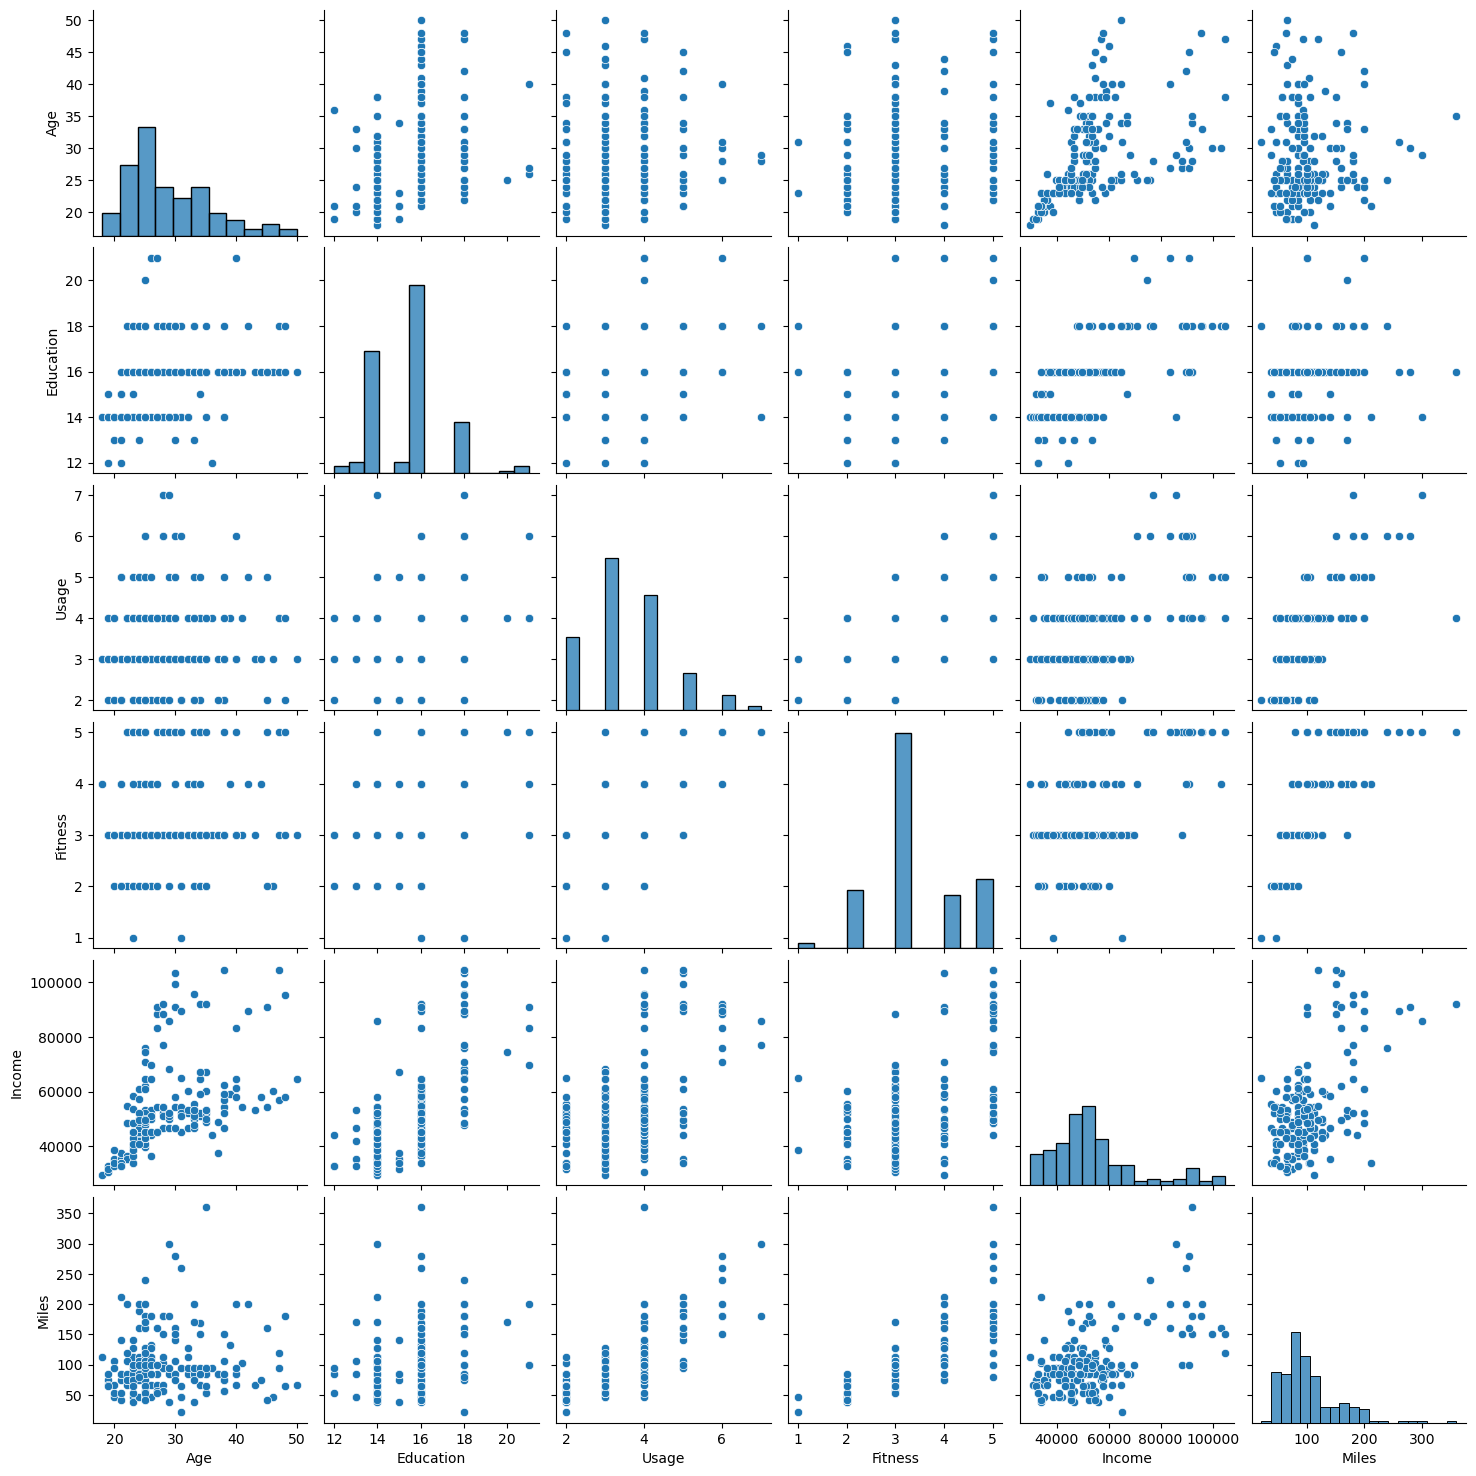

In [125]:
sns.pairplot(mydata)


In [126]:
mydata['Age'].std()


6.943498135399795

In [127]:
mydata['Age'].mean()


28.788888888888888

C:\Users\User\AppData\Local\Temp\ipykernel_12732\3718817797.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mydata['Age'])


<Axes: xlabel='Age', ylabel='Density'>

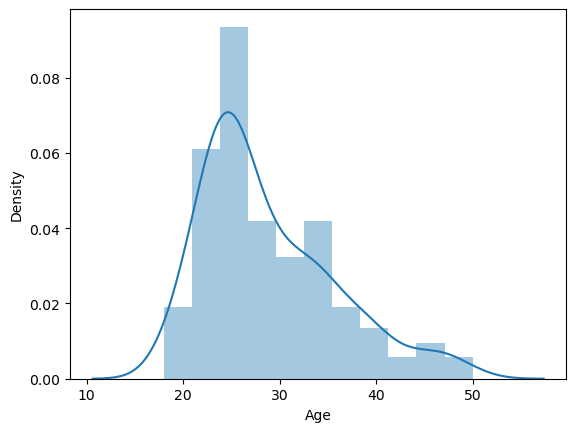

In [128]:
sns.distplot(mydata['Age'])


array([<Axes: title={'center': 'Female'}>,
       <Axes: title={'center': 'Male'}>], dtype=object)

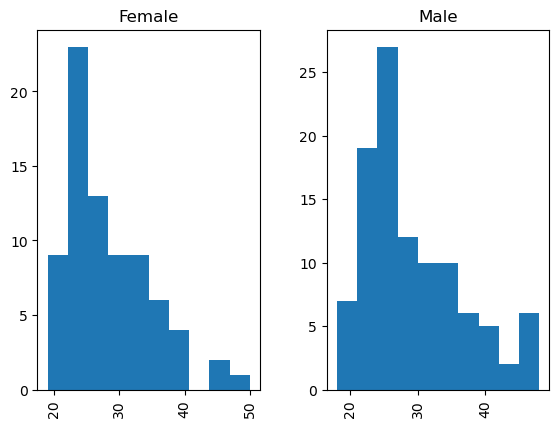

In [129]:
mydata.hist(by='Gender',column = 'Age')


array([<Axes: title={'center': 'Female'}>,
       <Axes: title={'center': 'Male'}>], dtype=object)

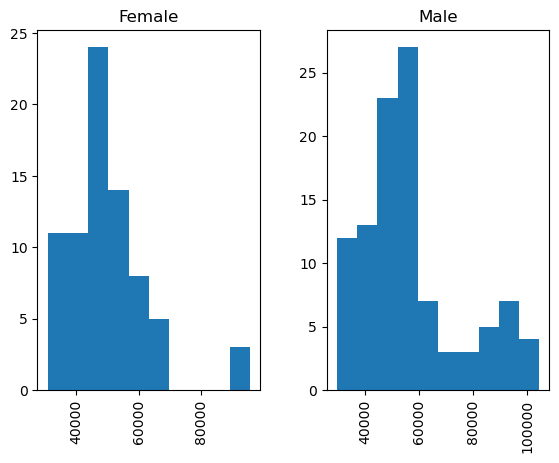

In [130]:
mydata.hist(by='Gender',column = 'Income')


array([<Axes: title={'center': 'Female'}>,
       <Axes: title={'center': 'Male'}>], dtype=object)

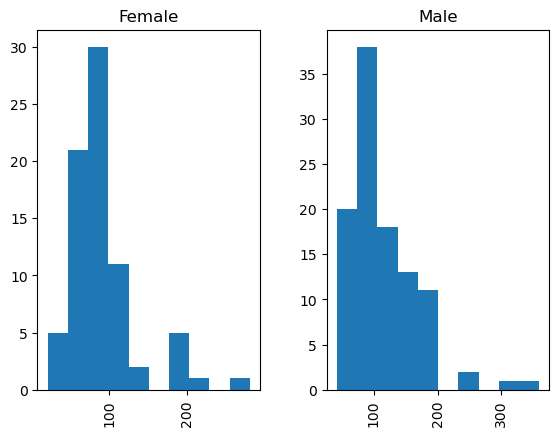

In [131]:
mydata.hist(by='Gender',column = 'Miles')


array([[<Axes: title={'center': 'TM195'}>,
        <Axes: title={'center': 'TM498'}>],
       [<Axes: title={'center': 'TM798'}>, <Axes: >]], dtype=object)

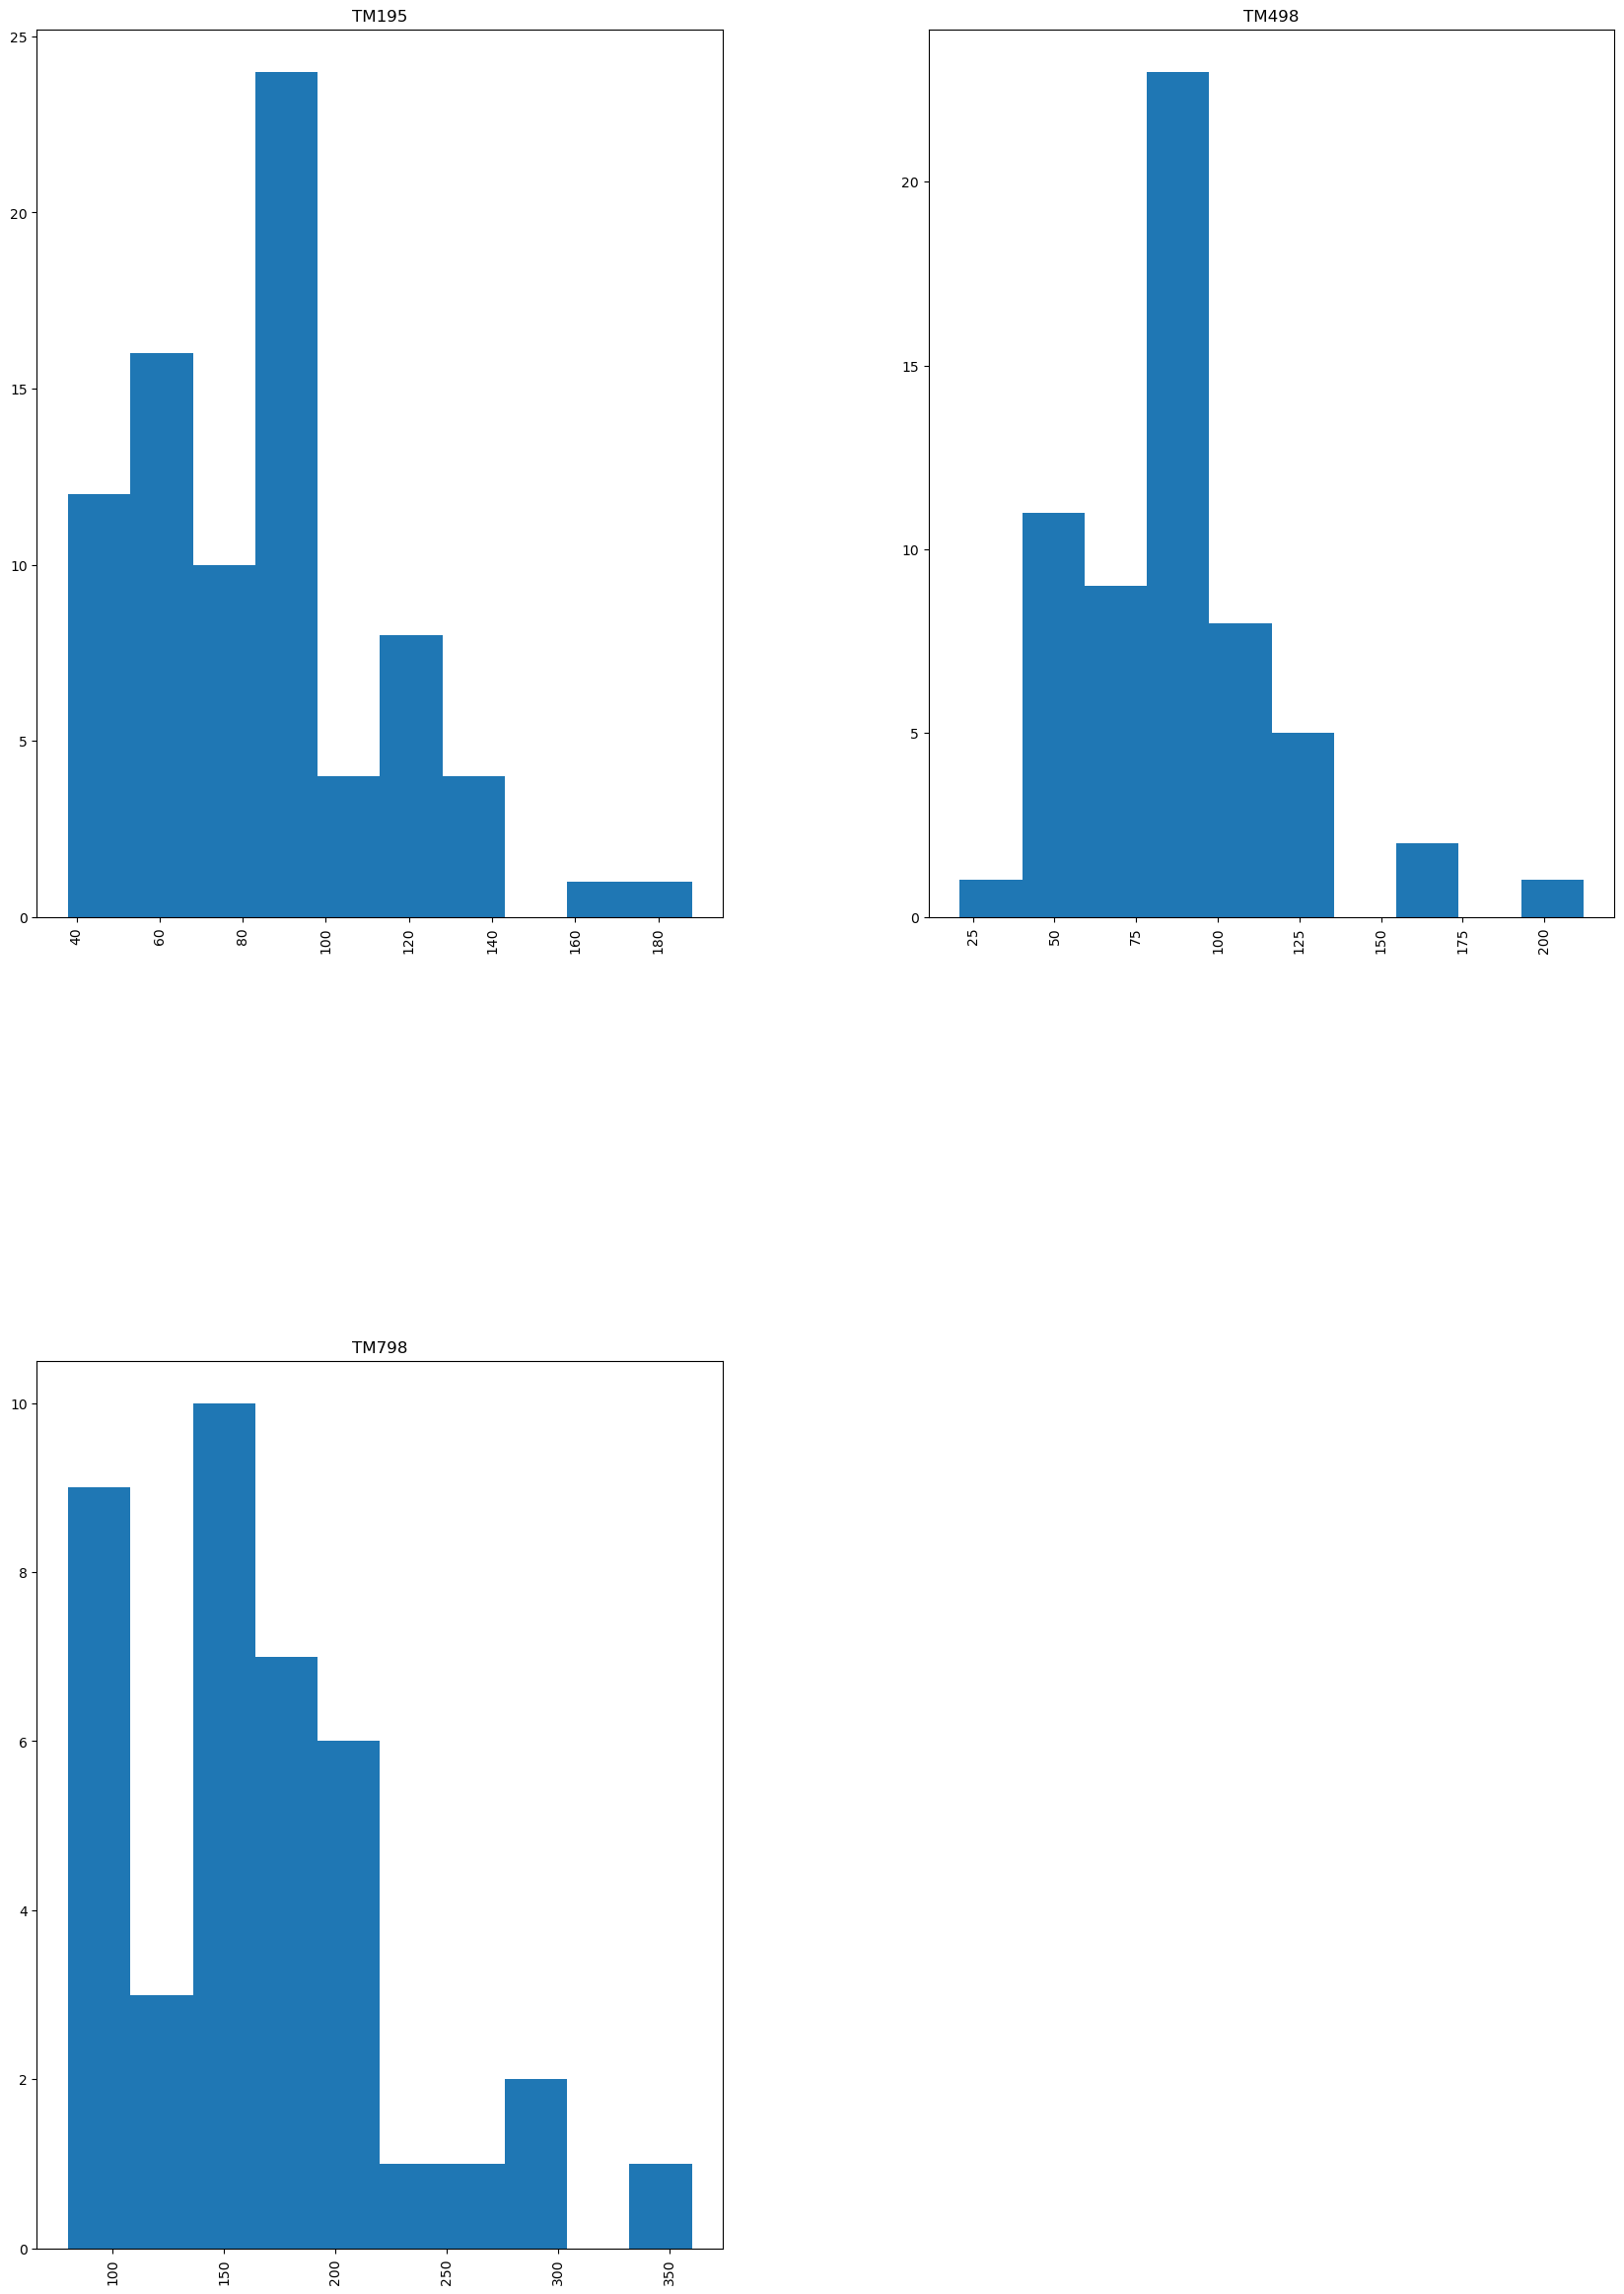

In [132]:
mydata.hist(by='Product',column = 'Miles', figsize=(20,30))


In [133]:
corr = mydata.corr()
corr


C:\Users\User\AppData\Local\Temp\ipykernel_12732\24935024.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = mydata.corr()


,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<Axes: >

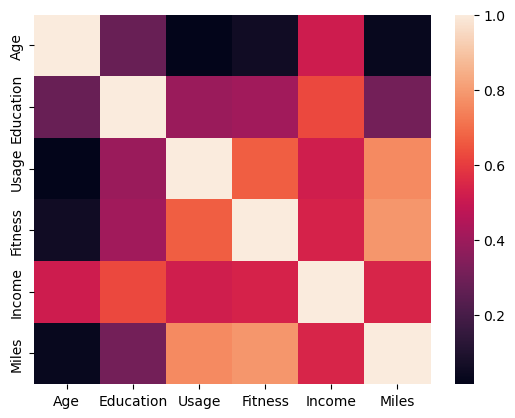

In [135]:
sns.heatmap(corr)


# POISSON DISTRIBUTION

In [136]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [137]:
rate = 6

In [138]:
n=np.arange(0,20)

In [139]:
poisson = stats.poisson.pmf(n,rate)
poisson

array([2.47875218e-03, 1.48725131e-02, 4.46175392e-02, 8.92350784e-02,
       1.33852618e-01, 1.60623141e-01, 1.60623141e-01, 1.37676978e-01,
       1.03257734e-01, 6.88384890e-02, 4.13030934e-02, 2.25289600e-02,
       1.12644800e-02, 5.19899078e-03, 2.22813891e-03, 8.91255562e-04,
       3.34220836e-04, 1.17960295e-04, 3.93200983e-05, 1.24168732e-05])

In [140]:
poisson[3]-poisson[2]

0.044617539179994496

In [141]:
1 - (poisson[0]+poisson[1]+poisson[2]+poisson[3])

0.8487961172233521

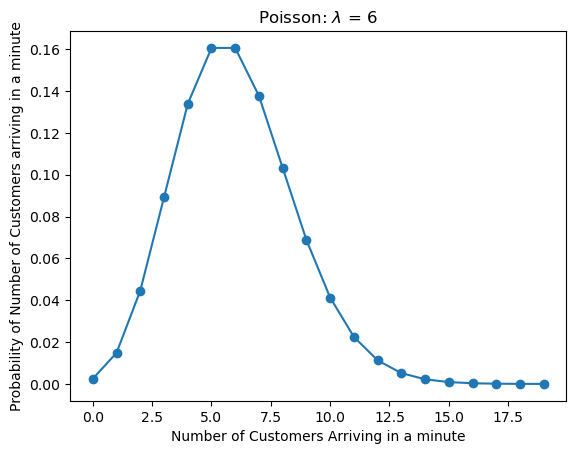

In [142]:
plt.plot(n,poisson,'o-')
plt.title('Poisson: $\lambda$ = %i ' % rate)
plt.xlabel('Number of Customers Arriving in a minute')
plt.ylabel('Probability of Number of Customers arriving in a minute')
plt.show()

# LOGARITIHM ANALYSIS

In [143]:
df = pd.read_csv("revenue.csv")
df.head(10)


,company,revenue
0,Tesla,31.0
1,UBER,11.0
2,Amazon,386.0
3,Jindal Steel,4.7
4,Axis Bank,5.6
5,Vedanta,11.3


<Axes: xlabel='company'>

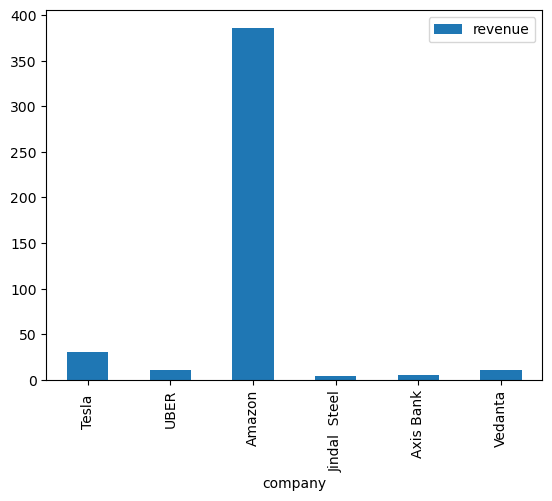

In [144]:
df.plot(x='company', y='revenue', kind='bar')


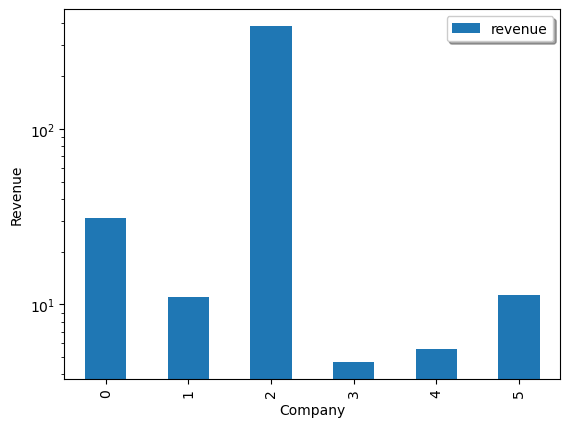

In [149]:
df.plot(kind='bar', logy=True)
plt.xlabel('Company')
plt.ylabel('Revenue')
plt.legend(shadow=True)


# GUASSIAN OR NORMAL DISTRIBUTION

In [150]:
import pandas as pd
import seaborn as sn

df = pd.read_csv("heights.csv")
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


(1) Outlier detection and removal using Standard Deviation



In [151]:
df.height.describe()


count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: height, dtype: float64

<Axes: xlabel='height', ylabel='Count'>

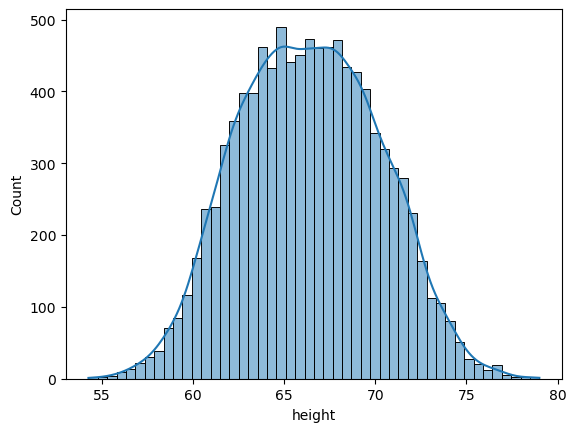

In [152]:
sn.histplot(df.height, kde=True)


In [153]:
mean = df.height.mean()
mean

66.367559754866

In [155]:
std_deviation = df.height.std()
std_deviation


3.847528120795573

In [156]:
mean-3*std_deviation


54.824975392479274

In [157]:
mean+3*std_deviation

77.91014411725271

In [159]:
df[(df.height < 54.82) | (df.height > 77.91)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [160]:
df_no_outlier = df[(df.height<77.91) & (df.height>54.82)]
df_no_outlier.shape

(9993, 2)

(9993, 2)
(2) Outlier detection and removal using Z Score

Z score is a way to achieve same thing that we did above in part (1)

Z score indicates how many standard deviation away a data point is.

For example in our case mean is 66.37 and standard deviation is 3.84.

If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)

Calculate the Z Score



In [162]:
df['zscore'] = ( df.height - df.height.mean() ) / df.height.std()
df.head(5)


,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [164]:
df.height.mean()


66.367559754866

In [165]:
df.height.std()


3.847528120795573

In [166]:
(73.84-66.37)/3.84


1.9453124999999998

In [167]:
df[df['zscore']>3]


,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [169]:
df[df['zscore']<-3]

,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


# LOGARITHMIC DISTRIBUTION


In [172]:
df = pd.read_csv(
    "income1.csv", 
    index_col=None, 
    names=["income","count"], 
    skiprows=1
)
df.head()


,income,count
0,5000,4371
1,10000,3295
2,15000,5825
3,20000,6047
4,25000,6097


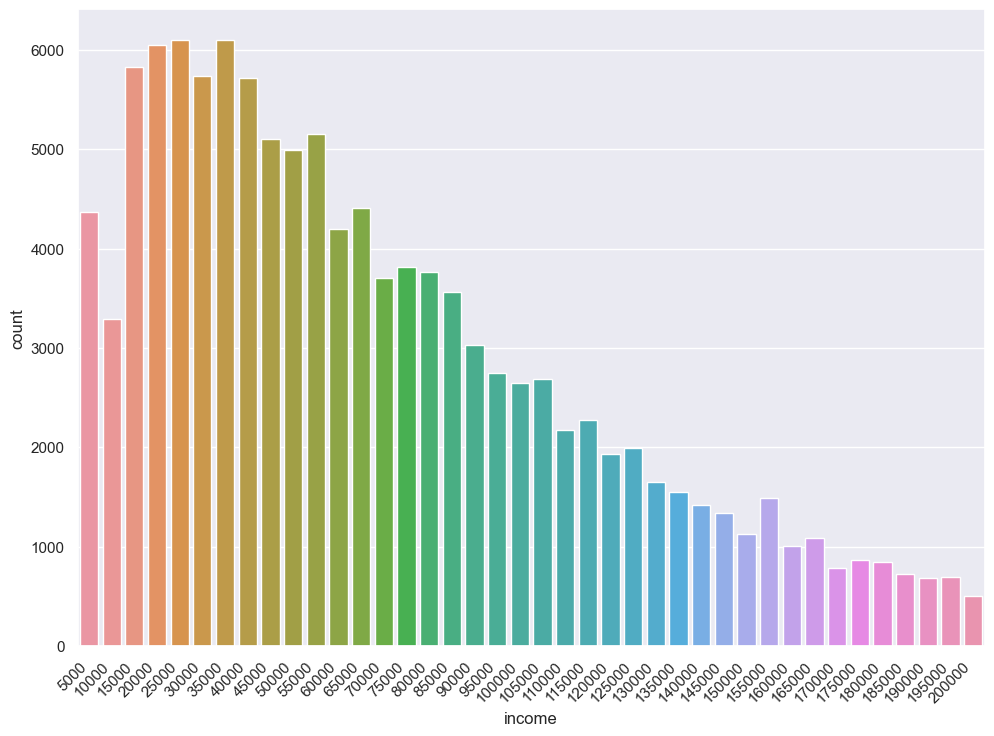

In [173]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.barplot(x='income',y='count',data=df)
g.set_xticklabels(g.get_xticklabels(), 
                          rotation=45, 
                          horizontalalignment='right');

# MODIFIED Z SCORE

In [174]:
df = pd.read_csv("movie_revenues.csv")
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",12/10/2009,2787965087,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,54000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",http://www.youmeanddupree.com/,1819,"[{""id"": 1253, ""name"": ""roommate""}, {""id"": 2038...",en,"You, Me and Dupree",After standing in as best man for his longtime...,18.600367,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",7/14/2006,130431368,108,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Two's company. Dupree's a crowd.,"You, Me and Dupree",5.4,407
2,21000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 53, ""name...",NaN,2575,"[{""id"": 246, ""name"": ""dancing""}, {""id"": 470, ""...",en,The Tailor of Panama,A British spy is banished to Panama after havi...,7.047975,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""IE"", ""name"": ""Ireland""}, {""is...",2/11/2001,28008462,109,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,"In a place this treacherous, what a good spy n...",The Tailor of Panama,6.2,92
3,1000000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...",NaN,26791,[],en,Brigham City,Wes Clayton is a lawman and a bishop in a Morm...,0.280083,"[{""name"": ""Main Street Movie Company"", ""id"": 6...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",3/30/2001,852206,119,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Brigham City,7.3,4
4,100000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 878, ""nam...",NaN,644,"[{""id"": 310, ""name"": ""artificial intelligence""...",en,A.I. Artificial Intelligence,"A robotic boy, the first programmed to love, D...",34.035114,"[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",6/29/2001,235926552,146,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,David is 11 years old. He weighs 60 pounds. He...,A.I. Artificial Intelligence,6.8,1974


In [175]:
df.revenue.describe()



count    4.600000e+01
mean     1.879289e+08
std      4.551144e+08
min      8.522060e+05
25%      2.866957e+07
50%      8.381714e+07
75%      1.382135e+08
max      2.787965e+09
Name: revenue, dtype: float64

In [176]:
df['revenue_mln'] = df['revenue'].apply(lambda x: x/1000000)
df.revenue_mln.describe()

count      46.000000
mean      187.928898
std       455.114423
min         0.852206
25%        28.669569
50%        83.817142
75%       138.213502
max      2787.965087
Name: revenue_mln, dtype: float64

In [178]:
_, mean, std, *_ = df.revenue_mln.describe()
mean

187.92889841304347

In [180]:
std


455.1144234195408

OUTLIER DETECTION USING ZSCORE

In [181]:
def get_z_score(value, mean, std):
    return (value - mean)/std

In [182]:
df['z_score'] = df.revenue_mln.apply(lambda x: get_z_score(x, mean, std))
df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,revenue_mln,z_score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2787.965087,5.712929
1,54000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",http://www.youmeanddupree.com/,1819,"[{""id"": 1253, ""name"": ""roommate""}, {""id"": 2038...",en,"You, Me and Dupree",After standing in as best man for his longtime...,18.600367,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,130431368,108,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Two's company. Dupree's a crowd.,"You, Me and Dupree",5.4,407,130.431368,-0.126336
2,21000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 53, ""name...",NaN,2575,"[{""id"": 246, ""name"": ""dancing""}, {""id"": 470, ""...",en,The Tailor of Panama,A British spy is banished to Panama after havi...,7.047975,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,28008462,109,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,"In a place this treacherous, what a good spy n...",The Tailor of Panama,6.2,92,28.008462,-0.351385


General guideline is to treat anything that has a z score of 3 or more as an outlier



In [183]:
df[df.z_score>3]


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,revenue_mln,z_score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2787.965087,5.712929


In [184]:
def get_mad(s):
    median = np.median(s)
    diff = abs(s-median)
    MAD = np.median(diff)
    return MAD

In [185]:
MAD = get_mad(df.revenue_mln)
median = np.median(df.revenue_mln)
MAD, median

(56.399542499999995, 83.8171415)

General guideline for modified Z score is to use 3.5 as a thresold. i.e. anything that has a mod z score of 3.5 or more is an outlier

In [186]:
def get_modified_z_score(x, median, MAD):
    return 0.6745*(x-median)/MAD

In [187]:
get_modified_z_score(2711, median, MAD)


31.41931227648256

In [188]:
df['mod_z_score'] = df.revenue_mln.apply(lambda x: get_modified_z_score(x, median, MAD))
df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,revenue_mln,z_score,mod_z_score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2787.965087,5.712929,32.339762
1,54000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",http://www.youmeanddupree.com/,1819,"[{""id"": 1253, ""name"": ""roommate""}, {""id"": 2038...",en,"You, Me and Dupree",After standing in as best man for his longtime...,18.600367,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,108,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Two's company. Dupree's a crowd.,"You, Me and Dupree",5.4,407,130.431368,-0.126336,0.557474
2,21000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 53, ""name...",NaN,2575,"[{""id"": 246, ""name"": ""dancing""}, {""id"": 470, ""...",en,The Tailor of Panama,A British spy is banished to Panama after havi...,7.047975,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,109,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,"In a place this treacherous, what a good spy n...",The Tailor of Panama,6.2,92,28.008462,-0.351385,-0.667434


In [189]:
df[df.mod_z_score>3.5]


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,revenue_mln,z_score,mod_z_score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2787.965087,5.712929,32.339762
7,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.jurassicworld.com/,135397,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 1718,...",en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,"[{""name"": ""Universal Studios"", ""id"": 13}, {""na...",...,124,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The park is open.,Jurassic World,6.5,8662,1513.528810,2.912674,17.098375
12,25000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 28, ""n...",NaN,619,"[{""id"": 1156, ""name"": ""sister sister relations...",en,The Bodyguard,A former Secret Service agent grudgingly takes...,26.576385,"[{""name"": ""Tig Productions"", ""id"": 335}, {""nam...",...,129,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Never let her out of your sight. Never let you...,The Bodyguard,6.1,661,411.006740,0.490158,3.912964
